In [1]:
from eose.targets import TargetPoint
from eose.geometry import Feature, FeatureCollection

import geopandas as gpd
from pydantic import ValidationError

# example constructing an object model
p1 = TargetPoint(position=[0, 0, 0], id=1, crs="EPSG:4326")
display(p1.model_dump_json())  # display EOSE JSON
display(p1.as_feature().model_dump_json())  # display GeoJSON

# example transforming from a GeoJSON object
p2 = TargetPoint.from_feature(
    Feature.model_validate(
        {
            "type": "Feature",
            "geometry": {"type": "Point", "coordinates": [-45, 45, 0]},
            "properties": {"id": 2, "crs": "EPSG:4326"},
        }
    )
)
display(p2.model_dump_json())  # display EOSE JSON
display(p2.as_feature().model_dump_json())  # display GeoJSON

# example validation error
try:
    TargetPoint(position=[-181, 0, 0])
except ValidationError as err:
    display(err)

# example transformation to a GeoDataFrame
targets = gpd.GeoDataFrame.from_features(
    FeatureCollection(features=[p.as_feature() for p in [p1, p2]]),
    crs="EPSG:4326" # bugfix rquired for geopandas < 0.14
)
display(targets)  # display GeoDataFrame

'{"id":1,"crs":"EPSG:4326","position":[0.0,0.0,0.0]}'

'{"type":"Feature","geometry":{"type":"Point","coordinates":[0.0,0.0,0.0]},"properties":{"id":1,"crs":"EPSG:4326"}}'

'{"id":2,"crs":"EPSG:4326","position":[-45.0,45.0,0.0]}'

'{"type":"Feature","geometry":{"type":"Point","coordinates":[-45.0,45.0,0.0]},"properties":{"id":2,"crs":"EPSG:4326"}}'

2 validation errors for TargetPoint
position.tuple[constrained-float, constrained-float]
  Tuple should have at most 2 items after validation, not 3 [type=too_long, input_value=[-181, 0, 0], input_type=list]
    For further information visit https://errors.pydantic.dev/2.8/v/too_long
position.tuple[constrained-float, constrained-float, float].0
  Input should be greater than or equal to -180 [type=greater_than_equal, input_value=-181, input_type=int]
    For further information visit https://errors.pydantic.dev/2.8/v/greater_than_equal

,geometry,id,crs
0,POINT Z (0.00000 0.00000 0.00000),1,EPSG:4326
1,POINT Z (-45.00000 45.00000 0.00000),2,EPSG:4326


In [2]:
from eose.grids import UniformAngularGrid
from shapely.geometry import box, mapping

# constructing an object model
g = UniformAngularGrid(
    delta_latitude=5, delta_longitude=5, region=mapping(box(-170, 0, -50, 90)), crs="EPSG:4326"
)
display(g.model_dump_json())  # display EOSE JSON
display(g.as_features().model_dump_json())  # display GeoJSON

# example transformation to a GeoDataFrame
grid = gpd.GeoDataFrame.from_features(
    g.as_features(),
    crs="EPSG:4326" # bugfix rquired for geopandas < 0.14
)
display(grid)  # display GeoDataFrame

'{"delta_longitude":5.0,"delta_latitude":5.0,"altitude":null,"region":{"type":"Polygon","coordinates":[[[-50.0,0.0],[-50.0,90.0],[-170.0,90.0],[-170.0,0.0],[-50.0,0.0]]]},"crs":"EPSG:4326"}'

'{"type":"FeatureCollection","features":[{"type":"Feature","geometry":{"type":"Point","coordinates":[-167.5,2.5]},"properties":{"id":1298,"crs":"EPSG:4326"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-162.5,2.5]},"properties":{"id":1299,"crs":"EPSG:4326"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-157.5,2.5]},"properties":{"id":1300,"crs":"EPSG:4326"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-152.5,2.5]},"properties":{"id":1301,"crs":"EPSG:4326"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-147.5,2.5]},"properties":{"id":1302,"crs":"EPSG:4326"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-142.5,2.5]},"properties":{"id":1303,"crs":"EPSG:4326"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-137.5,2.5]},"properties":{"id":1304,"crs":"EPSG:4326"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-132.5,2.5]},"properties":{"id":1305,"crs":"EPSG:4326"}},{"type":"Feature","geom

,geometry,id,crs
0,POINT (-167.50000 2.50000),1298,EPSG:4326
1,POINT (-162.50000 2.50000),1299,EPSG:4326
2,POINT (-157.50000 2.50000),1300,EPSG:4326
3,POINT (-152.50000 2.50000),1301,EPSG:4326
4,POINT (-147.50000 2.50000),1302,EPSG:4326
...,...,...,...
427,POINT (-72.50000 87.50000),2541,EPSG:4326
428,POINT (-67.50000 87.50000),2542,EPSG:4326
429,POINT (-62.50000 87.50000),2543,EPSG:4326
430,POINT (-57.50000 87.50000),2544,EPSG:4326


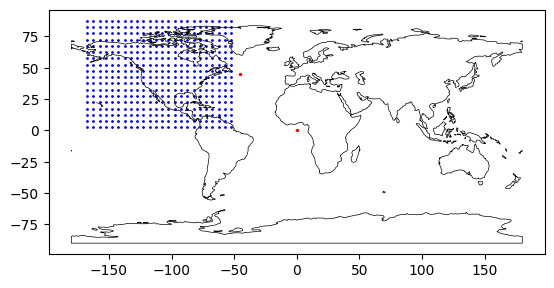

In [3]:
import matplotlib.pyplot as plt
import geopandas as gpd

# load shapefile
world = gpd.read_file(
    "https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip"
)

# example composite plot using GeoDataFrames
fig, ax = plt.subplots()
grid.plot(ax=ax, markersize=1, color="b")
targets.plot(ax=ax, markersize=2, color="r")
world.boundary.plot(ax=ax, lw=0.5, color="k")
ax.set_aspect("equal")
plt.show()